# Classification


### Notebook Content

## Binary Classification
1. Overview
2. Logistic Regression Classifier
3. Support Vector Classifier
4. Naive Bayes Classifier
5. Bernoulli Bayes Classifier
6. Gradient Boosting Classifier
7. XGBoost Classifier
8. Gradient Descent
9. Stochastic Gradient Descent
10. Decision Tree
11. Random Forest Classifier
12. KNN Classifier

# Overview
Classification is a process of categorizing a given set of data into classes. It can be performed on both structured or unstructured data. The process starts with predicting the class of given data points.The classes are often referred to as target, label or categories.<br>
The classification predictive modelling is the task of approximating the mapping function from input variables to discrete output variables. The main goal is to identify which class/category the new data will fall into.<br><br>
Depending on the nature of the target variable/variables, a classification task can be broadly classified into three types:<br><br>
**1. Binary Classification:** Grouping an outcome into one of two groups<br>
**2. Multiclass Classification:** Grouping an outcome into one of multiple (more than two) groups.<br>
**3. Multilabel Classification:** Multi-label classification is a generalization of multiclass classification, which is the single-label problem of categorizing instances into precisely one of more than two classes; in the multi-label problem there is no constraint on how many of the classes the instance can be assigned to.


In [1]:
#Import the required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report,log_loss

<a class="list-group-item list-group-item-action" data-toggle="list" href="#Classification" role="tab" aria-controls="profile">Go to top<span class="badge badge-primary badge-pill"></span></a>

<a id="1"></a>

# Binary Classification
For binary classification, data is classified into one of two binary groups - these are usually represented as 0's and 1's in the data.<br><br>
The dataset used to demostrate the use of different binary classification algorithms below can be downloaded from: <Br>
https://www.kaggle.com/uciml/pima-indians-diabetes-database


In [2]:
#import the data
df = pd.read_csv(r'diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [16]:
df.shape

(768, 9)

The Pima Indians Diabetes Dataset involves predicting the onset of diabetes. There are 768 observations with 8 input variables and 1 output variable. Missing values are believed to be encoded with zero values. 

In [18]:
print(df.groupby('Outcome').size())

Outcome
0    500
1    268
dtype: int64


In [3]:
#Split data into test and train
X = df.iloc[:, :-1]
y = df.iloc[:, -1]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

<a class="list-group-item list-group-item-action" data-toggle="list" href="#Classification" role="tab" aria-controls="profile">Go to top<span class="badge badge-primary badge-pill"></span></a>

# Logistic Regression Classifier
In this algorithm, the probabilities describing the possible outcomes of a single trial are modelled using a logistic function.
It is used to model the probability of a certain class or event existing 
such as pass/fail, win/lose, alive/dead or healthy/sick.

C:\Users\duhita\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Accuracy  79.16666666666666


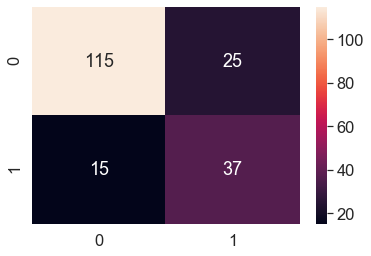

In [4]:
#Model
LR = LogisticRegression()

#fiting the model
LR.fit(X_train, y_train)

#prediction
y_pred = LR.predict(X_test)

#Accuracy
print("Accuracy ", LR.score(X_test, y_test)*100)

#Plot the confusion matrix
sns.set(font_scale=1.5)
cm = confusion_matrix(y_pred, y_test)
sns.heatmap(cm, annot=True, fmt='g')
plt.show()

<a class="list-group-item list-group-item-action" data-toggle="list" href="#Classification" role="tab" aria-controls="profile">Go to top<span class="badge badge-primary badge-pill"></span></a>

# Support Vector Classifier
The support vector machine is a classifier that represents the training data as points in space separated into categories by a gap as wide as possible. 
New points are then added to space by predicting which category they fall into and which space they will belong to.

More often text classification use cases will have linearly separable data and LinearSVC is apt for such scenarios.

C:\Users\duhita\anaconda3\lib\site-packages\sklearn\svm\_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Accuracy  58.333333333333336


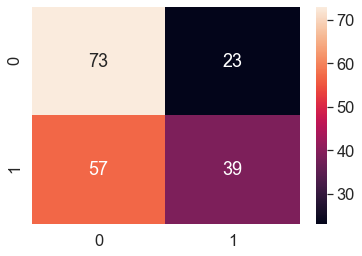

In [5]:
#Model
SVC = LinearSVC()

#fiting the model
SVC.fit(X_train, y_train)

#prediction
y_pred = SVC.predict(X_test)

#Accuracy
print("Accuracy ", SVC.score(X_test, y_test)*100)

#Plot the confusion matrix
sns.set(font_scale=1.5)
cm = confusion_matrix(y_pred, y_test)
sns.heatmap(cm, annot=True, fmt='g')
plt.show()

<a class="list-group-item list-group-item-action" data-toggle="list" href="#Classification" role="tab" aria-controls="profile">Go to top<span class="badge badge-primary badge-pill"></span></a>

# Naive Bayes Classifier
It is based on Bayes’s theorem which gives an assumption of independence among predictors. 
A Naive Bayes classifier assumes that the presence of a particular feature in a class is unrelated to the presence of any other feature. 

Accuracy  60.416666666666664


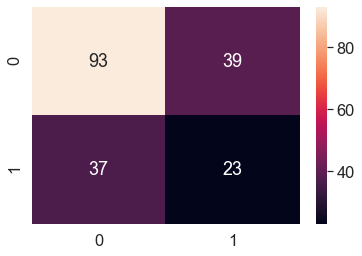

In [6]:
#Model
MNB = MultinomialNB()

#fiting the model
MNB.fit(X_train, y_train)

#prediction
y_pred = MNB.predict(X_test)

#Accuracy
print("Accuracy ", MNB.score(X_test, y_test)*100)

#Plot the confusion matrix
sns.set(font_scale=1.5)
cm = confusion_matrix(y_pred, y_test)
sns.heatmap(cm, annot=True, fmt='g')
plt.show()

<a class="list-group-item list-group-item-action" data-toggle="list" href="#Classification" role="tab" aria-controls="profile">Go to top<span class="badge badge-primary badge-pill"></span></a>

# Bernoulli Naive Bayes Classifier
BernoulliNB implements the naive Bayes training and classification algorithms for data that is distributed according to multivariate Bernoulli distributions; i.e., there may be multiple features but each one is assumed to be a binary-valued (Bernoulli, boolean) variable.<br>
Therefore, this class requires samples to be represented as binary-valued feature vectors; if handed any other kind of data, a BernoulliNB instance may binarize its input.

Accuracy  67.1875


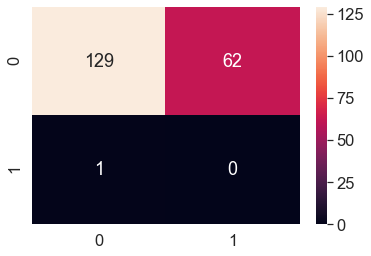

In [7]:
#Model
BNB = BernoulliNB()

#fiting the model
BNB.fit(X_train, y_train)

#prediction
y_pred = BNB.predict(X_test)

#Accuracy
print("Accuracy ", BNB.score(X_test, y_test)*100)

#Plot the confusion matrix
sns.set(font_scale=1.5)
cm = confusion_matrix(y_pred, y_test)
sns.heatmap(cm, annot=True, fmt='g')
plt.show()

<a class="list-group-item list-group-item-action" data-toggle="list" href="#Classification" role="tab" aria-controls="profile">Go to top<span class="badge badge-primary badge-pill"></span></a>

# Gradient Boost Classifier
Gradient Boosting builds an additive model in a forward stage-wise fashion. It allows for the optimization of arbitrary differentiable loss functions.

In [1]:
#Model
GBC = GradientBoostingClassifier()

#fiting the model
GBC.fit(X_train, y_train)

#prediction
y_pred = GBC.predict(X_test)

#Accuracy
print("Accuracy ", GBC.score(X_test, y_test)*100)

#Plot the confusion matrix
sns.set(font_scale=1.5)
cm = confusion_matrix(y_pred, y_test)
sns.heatmap(cm, annot=True, fmt='g')
plt.show()

NameError: name 'GradientBoostingClassifier' is not defined

<a class="list-group-item list-group-item-action" data-toggle="list" href="#Classification" role="tab" aria-controls="profile">Go to top<span class="badge badge-primary badge-pill"></span></a>

# XGBoost Classifier
XGBoost is a decision-tree-based ensemble Machine Learning algorithm that uses a gradient boosting framework. Rather than training all the models in isolation of one another, boosting trained models in succession with each new model being trained to correct the errors made by the previous ones.

In a standard ensemble method where models are trained in isolation, all of the models might simply end up making the same mistakes. <br>We should use this algorithm when we require fast and accurate predictions after the model is deployed.

Accuracy  79.6875


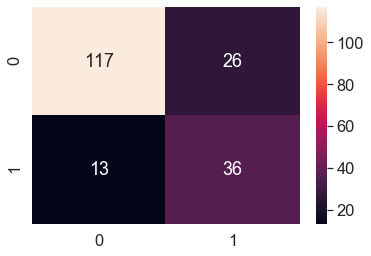

In [9]:
#Model
XGB = XGBClassifier(loss = 'deviance',
                        learning_rate = 0.01,
                        n_estimators = 10,
                        max_depth = 5,
                        verbosity=0,
                        random_state=0)

#fiting the model
XGB.fit(X_train, y_train)

#prediction
y_pred = XGB.predict(X_test)

#Accuracy
print("Accuracy ", XGB.score(X_test, y_test)*100)

#Plot the confusion matrix
sns.set(font_scale=1.5)
cm = confusion_matrix(y_pred, y_test)
sns.heatmap(cm, annot=True, fmt='g')
plt.show()

<a class="list-group-item list-group-item-action" data-toggle="list" href="#Classification" role="tab" aria-controls="profile">Go to top<span class="badge badge-primary badge-pill"></span></a>

# Stochastic Gradient Descent
SGD has been successfully applied to large-scale and sparse machine learning problems often encountered in text classification and natural language processing. <br>
Given that the data is sparse, the classifiers in this module easily scale to problems with more than 10^5 training examples and more than 10^5 features.

Accuracy  59.895833333333336


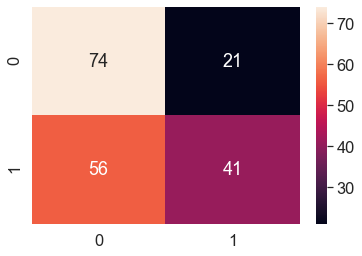

In [10]:
#Model
SGDC = SGDClassifier()

#fiting the model
SGDC.fit(X_train, y_train)

#prediction
y_pred = SGDC.predict(X_test)

#Accuracy
print("Accuracy ", SGDC.score(X_test, y_test)*100)

#Plot the confusion matrix
sns.set(font_scale=1.5)
cm = confusion_matrix(y_pred, y_test)
sns.heatmap(cm, annot=True, fmt='g')
plt.show()

<a class="list-group-item list-group-item-action" data-toggle="list" href="#Classification" role="tab" aria-controls="profile">Go to top<span class="badge badge-primary badge-pill"></span></a>

# Decision Tree
The decision tree algorithm builds the classification model in the form of a tree structure. It utilizes the if-then rules which are equally exhaustive and mutually exclusive in classification.<br>
We can use decision tree when there are missing values in the data and when pre processing time is to be reduced as it does not require pre processing.

Accuracy  76.5625


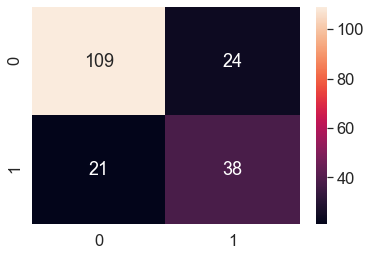

In [11]:
#Model
DT = DecisionTreeClassifier(criterion= 'entropy',
                                           max_depth = 10, 
                                           splitter='best',
                                           random_state=0)

#fiting the model
DT.fit(X_train, y_train)

#prediction
y_pred = DT.predict(X_test)

#Accuracy
print("Accuracy ", DT.score(X_test, y_test)*100)

#Plot the confusion matrix
sns.set(font_scale=1.5)
cm = confusion_matrix(y_pred, y_test)
sns.heatmap(cm, annot=True, fmt='g')
plt.show()

<a class="list-group-item list-group-item-action" data-toggle="list" href="#Classification" role="tab" aria-controls="profile">Go to top<span class="badge badge-primary badge-pill"></span></a>

# Random Forest Classifier
Random forest are an **ensemble learning method**. It operates by **constructing a multitude of decision trees** at training time and outputs the class that is the mode of the classes of the individual trees.<br>
A random forest is **a meta-estimator that fits a number of trees on various subsamples of data sets** and then uses an average to improve the accuracy in the model’s predictive nature. The sub-sample size is always the same as that of the original input size but the samples are often drawn with replacements.<br>
We should use this algorithm when we need high accuracy while working with large datasets with higher dimensions. We can also use it if there are missing values in the dataset. We should not use it if we have less time for modeling or if large computational costs and memory space are a constrain.

Accuracy  78.64583333333334


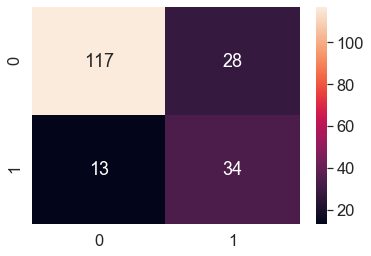

In [12]:
#Model
RF = RandomForestClassifier()

#fiting the model
RF.fit(X_train, y_train)

#prediction
y_pred = RF.predict(X_test)

#Accuracy
print("Accuracy ", RF.score(X_test, y_test)*100)

#Plot the confusion matrix
sns.set(font_scale=1.5)
cm = confusion_matrix(y_pred, y_test)
sns.heatmap(cm, annot=True, fmt='g')
plt.show()

<a class="list-group-item list-group-item-action" data-toggle="list" href="#Classification" role="tab" aria-controls="profile">Go to top<span class="badge badge-primary badge-pill"></span></a>

# KNN Classifier
It is **a lazy learning algorithm** that stores all instances corresponding to training data in n-dimensional space
To label a new point, it looks at the labeled points closest to that new point also known as its nearest neighbors.<br>
We should use KNN when the dataset is small and speed is a priority (real-time).

Accuracy  76.5625


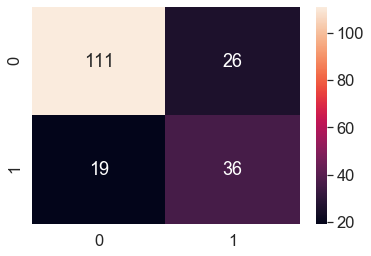

In [13]:
#Model
KNN = KNeighborsClassifier(n_neighbors = 10,weights = 'distance',algorithm = 'brute')

#fiting the model
KNN.fit(X_train, y_train)

#prediction
y_pred = KNN.predict(X_test)

#Accuracy
print("Accuracy ", KNN.score(X_test, y_test)*100)

#Plot the confusion matrix
sns.set(font_scale=1.5)
cm = confusion_matrix(y_pred, y_test)
sns.heatmap(cm, annot=True, fmt='g')
plt.show()